# Preliminary analysis of the Dataset

I just downloaded the dataset and want to determine the structure and the nature of variables in it

In [1]:
import pandas as pd
import seaborn as sns

data = pd.read_json('dataset_airbnb-scraper_2023-07-13_04-11-55-176.json')
data.head(2)

,url,name,stars,numberOfGuests,address,roomType,location,reviews,pricing,photos,...,availabilityModule,additionalHouseRules,sortedReviews,documentDisplayPictures,sections,metadata,p3ImpressionId,idStr,paidGrowthRemarketingListingIdsStr,accessibilityModule
0,https://www.airbnb.com/rooms/53964791,PAZ 201 CAFÉ,4.89,6,"Medellín, Antioquia, Colombia",Alojamiento entero: apartamento con servicios,"{'lat': 6.21002, 'lng': -75.56612}","[{'author': {'firstName': 'Jaime', 'hasProfile...","{'rate': {'amount': 300, 'amountFormatted': '$...","[{'caption': '', 'pictureUrl': 'https://a0.mus...",...,{},"•\tGuest friendly, just 1 visitor per register...",[],[],[],{},e876bb52-6baa-3de4-79a6-c6aa805630bc,53964791,[],NaN
1,https://www.airbnb.com/rooms/27229405,2 BR @ Parque Lleras withTerrace and Jacuzzi,NaN,2,"Medellín, Antioquia, Colombia",Habitación en apartahotel,"{'lat': 6.21118, 'lng': -75.56892}",[],"{'rate': {'amount': 414, 'is_micros_accuracy':...",[{'caption': 'Fantastic Bed on the top Floor B...,...,{},- Be quiet after 3 am,[],[],[],{},0c9dd893-fd8e-871c-6ec9-799e99546da4,27229405,[],NaN


In [2]:
data.columns

Index(['url', 'name', 'stars', 'numberOfGuests', 'address', 'roomType',
       'location', 'reviews', 'pricing', 'photos', 'primaryHost',
       'additionalHosts', 'isHostedBySuperhost', 'isAvailable', 'calendar',
       'occupancyPercentage', 'listingAmenities', 'rootAmenitySections',
       'seeAllAmenitySections', 'bathroomLabel', 'bedLabel', 'bedroomLabel',
       'hasHouseRules', 'id', 'isNewListing', 'license', 'listingRooms',
       'p3SummaryAddress', 'roomTypeCategory', 'sectionedDescription',
       'tierId', 'guestControls', 'hasSpecialOffer', 'maxNights', 'minNights',
       'priceDetails', 'hasWeWorkLocation', 'isBusinessTravelReady',
       'hometourRooms', 'hometourSections', 'descriptionLocale',
       'initialDescriptionAuthorType', 'localizedCheckInTimeWindow',
       'localizedCheckOutTime', 'city', 'country', 'countryCode',
       'hasHostGuidebook', 'hasLocalAttractions', 'neighborhoodCommunityTags',
       'state', 'paidGrowthRemarketingListingIds', 'hasCommercial

In [3]:
import numpy as np
for c in data.columns:
    if type(data[c][0]) == str:
        print('|'+c+'|str|')
    elif isinstance(data[c][0], np.floating):
        print('|'+c+'|float|')
    elif isinstance(data[c][0], np.int64):
        print('|'+c+'|int|')
    elif type(data[c][0]) == list:
        print('|'+c+'|list|')
    elif type(data[c][0]) == dict:
        print('|'+c+'|dict|')
    elif isinstance(data[c][0], np.bool_):
        print('|'+c+'|bool|')

|url|str|
|name|str|
|stars|float|
|numberOfGuests|int|
|address|str|
|roomType|str|
|location|dict|
|reviews|list|
|pricing|dict|
|photos|list|
|primaryHost|dict|
|additionalHosts|list|
|isHostedBySuperhost|bool|
|isAvailable|float|
|calendar|list|
|occupancyPercentage|float|
|listingAmenities|list|
|rootAmenitySections|list|
|seeAllAmenitySections|list|
|bathroomLabel|str|
|bedLabel|str|
|bedroomLabel|str|
|hasHouseRules|bool|
|id|int|
|isNewListing|bool|
|license|float|
|listingRooms|list|
|p3SummaryAddress|str|
|roomTypeCategory|str|
|sectionedDescription|dict|
|tierId|int|
|guestControls|dict|
|hasSpecialOffer|bool|
|maxNights|int|
|minNights|int|
|priceDetails|list|
|hasWeWorkLocation|bool|
|isBusinessTravelReady|bool|
|hometourRooms|list|
|hometourSections|list|
|descriptionLocale|str|
|initialDescriptionAuthorType|str|
|localizedCheckInTimeWindow|str|
|localizedCheckOutTime|str|
|city|str|
|country|str|
|countryCode|str|
|hasHostGuidebook|bool|
|hasLocalAttractions|bool|
|neigh

In [4]:
occup = data.occupancyPercentage[0]
print('Occupancy as calculated by Apify:', occup)

Occupancy as calculated by Apify: 44.66


In [5]:
## Making sure the occupancyPercentage variable is what I think it is

df = pd.DataFrame.from_dict(data.calendar[0])
#print( df[df.available == True].count() )
oc = df[df.available == False].count() * 100 / df.count()
assert round(occup, 2) == round( oc.available, 2), "Occupancy percentages are incosistent"
print('Occupancy calculated with available days is consistent with the one in table')

Occupancy calculated with available days is consistent with the one in table


## All Variables of full-sized JSON

|Column|Type|Description|
|------|----|-----------|
|url|str||Y|
|name|str||Y|
|stars|float||Y|
|numberOfGuests|int||Y|
|address|str|e.g., 'El Poblado, Medellín, Antioquia, Colombia'|N|
|roomType|str||Y|
|location|dict|e.g., {'lat': 6.20859, 'lng': -75.56774} |Y|
|reviews|list|metadata with reviews information|
|pricing|dict|pricing information, metadata|Y - pricing.rate.amount|
|photos|list| URL of photos|
|primaryHost|dict| info of Host, metadata|
|additionalHosts|list|additional info of Host, metadata|
|isHostedBySuperhost|bool||
|isAvailable|float|1. or nan|
|calendar|list|Every day availability of listing|
|occupancyPercentage|float||
|listingAmenities|list| amenities in the premise|
|rootAmenitySections|list| XXX I do not know|
|seeAllAmenitySections|list||
|bathroomLabel|str|Numero de baños, `'2,5 baños'`|
|bedLabel|str|e.g., `'7 camas'`|
|bedroomLabel|str|e.g., `'3 dormitorios'`|
|hasHouseRules|bool|`True` or `False`|
|id|int|7-8 digit integer|
|isNewListing|bool|
|license|float|i do not know|
|listingRooms|list| type of bed in each room, metadata|
|p3SummaryAddress|str|Seems the same as `address`|
|roomTypeCategory|str| 'entire_home', 'private_room', 'hotel_room', 'shared_room'|
|sectionedDescription|dict|Text, `'authorType', 'description', 'houseRules'...`|
|tierId|int|All Zero, 0|
|guestControls|dict|`'allowsChildren', 'allowsEvents', 'allowsPets', ...`|
|hasSpecialOffer|bool|Mostly `False`|
|maxNights|int||
|minNights|int|
|priceDetails|list|Other expenses `'Gastos de limpieza'` etc.|
|hasWeWorkLocation|bool|All `False`| 
|isBusinessTravelReady|bool|All 'False'|
|hometourRooms|list|???|
|hometourSections|list|???|
|descriptionLocale|str|`'en', 'es', 'it', 'de', ...`|
|initialDescriptionAuthorType|str|All `'human'`| 
|localizedCheckInTimeWindow|str||
|localizedCheckOutTime|str|
|city|str|`'Medellín', 'Amagá', 'El Retiro', 'Envigado', ...`|
|country|str|`'Coloimbia'`|
|countryCode|str|`'Co'`|
|hasHostGuidebook|bool|All `False`|
|hasLocalAttractions|bool|All `False`|
|neighborhoodCommunityTags|list| ????|
|state|str|`'Antioquia', 'Antioquia, Ciudad de Bolivar ', ...`|
|paidGrowthRemarketingListingIds|list| ???|
|hasCommercialHostInfo|bool||
|reviewDetailsInterface|dict|`'reviewCount'` and `'reviewSummary'`|
|reviewsOrder|str|All `'language_country'`|
|nearbyAirportDistanceDescriptions|list|???|
|renderTierId|int|All 0|
|isHotel|bool|
|showReviewTag|bool|All `False`|
|isRepresentativeInventory|bool|???|
|localizedCity|str|`'Medellín', 'Amagá', 'El Retiro', ...`|
|highlights|list|Messages from the visitors|
|highlightsImpressionId|str|something like `'ebcd798b-56b9-245b-9663-269436fe77ef'`|
|categorizedPreviewAmenities|list|
|pointOfInterests|list|Empty ???|
|chinaPointsOfInterestMatcha|dict|Empty >???|
|pageViewType|str|All `'DEFAULT'`|
|previewTags|list|Empty ???|
|seeAllHometourSections|list|Empty ???|
|enableHighlightsVoting|bool|All `False`|
|listingExpectations|list|Some details to take note, e.g., 'noise', 'escaleras'|
|localizedListingExpectations|list|Similar to previous one|
|heroModule|dict|Empty ???|
|reviewsModule|dict|Inside `'localizedOverallRating'`|
|availabilityModule|dict|Empty ???|
|additionalHouseRules|str|Long text, rules|
|sortedReviews|list| Empty ???|
|documentDisplayPictures|list| Empty ???|
|sections|list| Empty ???|
|metadata|dict|Empty ???|
|p3ImpressionId|str| like `ebcd798b-56b9-245b-9663-269436fe77ef`
|idStr|int|Like `40751388`|
|paidGrowthRemarketingListingIdsStr|list|Empty ???|

In [6]:
print( data.pricing[0]['rate']['amount'] )
print( data.listingRooms[0][0]['beds'][0]['type'] )
print( data.sectionedDescription[0]['locale'])
print( len( data.sectionedDescription[0]['description'] ) )
print( data.priceDetails[0][0]['attributeType'], data.priceDetails[0][0]['value'])
print( data.reviewDetailsInterface[0]['reviewCount'])
print( 'Balcon? ', 'balc' in data.categorizedPreviewAmenities[0][1]['amenities'])
print( len(data.additionalHouseRules[0]) )

300
queen_bed
es
3059
CLEANING_FEE 68 €
76
Balcon?  False
741


In [58]:
data.heroModule

0      {'categorizedPhotos': []}
1      {'categorizedPhotos': []}
2      {'categorizedPhotos': []}
3      {'categorizedPhotos': []}
4      {'categorizedPhotos': []}
                 ...            
660    {'categorizedPhotos': []}
661    {'categorizedPhotos': []}
662    {'categorizedPhotos': []}
663    {'categorizedPhotos': []}
664    {'categorizedPhotos': []}
Name: heroModule, Length: 665, dtype: object

In [7]:
df = data.copy()

df.drop(columns=['address', 'reviews', 'photos', 'additionalHosts', 'rootAmenitySections'], inplace=True)
df.drop(columns=['seeAllAmenitySections', 'license', 'p3SummaryAddress', 'tierId', 'hasSpecialOffer'], inplace=True)
df.drop(columns=['hasWeWorkLocation', 'isBusinessTravelReady', 'hometourRooms', 'hometourSections'], inplace=True)
df.drop(columns=['country', 'countryCode', 'hasHostGuidebook', 'hasLocalAttractions', 'neighborhoodCommunityTags'], inplace=True)
df.drop(columns=['state', 'paidGrowthRemarketingListingIds', 'reviewsOrder', 'nearbyAirportDistanceDescriptions'], inplace=True)
df.drop(columns=['renderTierId', 'showReviewTag', 'localizedCity', 'highlights', 'highlightsImpressionId'], inplace=True)
df.drop(columns=['pointOfInterests', 'chinaPointsOfInterestMatcha', 'pageViewType', 'previewTags'], inplace=True)
df.drop(columns=['seeAllHometourSections', 'enableHighlightsVoting', 'listingExpectations'], inplace=True)
df.drop(columns=['localizedListingExpectations', 'heroModule', 'reviewsModule', 'availabilityModule'], inplace=True)
df.drop(columns=['sortedReviews', 'documentDisplayPictures', 'sections', 'metadata', 'idStr'])
df.head(3)

def responsetime(x):
    if x.get('responseTime', np.nan) == 'en menos de una hora':
        return 1
    elif x.get('responseTime', np.nan) == 'en pocas horas':
        return 2
    elif x.get('responseTime', np.nan) == 'en el mismo día':
        return 3
    elif x.get('responseTime', np.nan) == 'en unos días o más':
        return 4
    elif x.get('responseTime', np.nan) == np.nan:
        return np.nan

def badges(x):
    if x['badges'] and x['badges'][0] != 'Identidad verificada':
        try:    # I had a problem in Bogota's database [invalid literal for int() with base 10: '1 referencia']
            return int(x['badges'][0].split('\xa0')[0].replace('.',''))
        except:
            return np.nan
    else:
        return np.nan
    
def roomtype(x):
    if x == 'entire_home':
        return 1
    elif x == 'private_room':
        return 2
    elif x == 'hotel_room':
        return 3
    elif x == 'shared_room':
        return 4

def cleaningg_fee(x):
    for i in x:
        if i['attributeType'] == 'CLEANING_FEE':
            return float( i['value'].split('\xa0')[0] )
    else:
        return np.nan

def fianza(x):
    for i in x:
        if i['attributeType'] == 'HOST_REQUIRED_SECURITY_DEPOSIT':
            return float( i['value'].split('\xa0')[0] )
    else:
        return np.nan

def reviewscore(x, feature):
    if x['reviewCount'] == 0:
        return np.nan
    if x['reviewSummary']:
        for i in x['reviewSummary']:
            if i['label'] == feature:
                return i['value']
    else:
        np.nan

df['loc_lat'] = df.location.apply(lambda x: x['lat'])
df['loc_long'] = df.location.apply(lambda x: x['lng'])
df.drop(columns=['location'], inplace=True)

# the .get method allows to provide a value if the key does not exist
df['price'] = df.pricing.apply(
    lambda x: x.get('rate', {}).get('amount', np.nan) if isinstance(x, dict) and x.get('rate', {}).get('amount', 0) > 0 else np.nan)
df.drop(columns=['pricing'], inplace=True)

df['profile_pic'] = df.primaryHost.apply(lambda x: 1 if x['hasProfilePic'] == True else 0)
df['num_languages'] = df.primaryHost.apply(lambda x: len(x['languages']))
df['responseRate'] = df.primaryHost.apply(responsetime)
df['hostBadgeEvaluations'] = df.primaryHost.apply(badges)
df['hostListingCount'] = df.primaryHost.apply(lambda x: x.get('listingsCount', np.nan))
df.drop(columns=['primaryHost'], inplace=True)

df['superHost'] = df.isHostedBySuperhost.apply(lambda x: 1 if x == True else 0)
df.drop(columns=['isHostedBySuperhost'], inplace=True)

## TODO - Listing amenities
# df['calefaccion'] = 
df.drop(columns=['listingAmenities'], inplace=True)

df['numBaths'] = df.bathroomLabel.apply(lambda x: float(x.split(' ')[0].replace(',', '.')) if x and ' ' in x else np.nan)
df['numBeds'] = df.bedLabel.apply(lambda x: int(x.split(' ')[0]) if x and ' ' in x else np.nan)
df['numBedrooms'] = df.bedroomLabel.apply(lambda x: int(x.split(' ')[0]) if x and ' ' in x else np.nan)
df.drop(columns=['bathroomLabel', 'bedLabel', 'bedroomLabel'], inplace=True)

df['roomTypeCateg'] = df.roomTypeCategory.apply(roomtype)
df.drop(columns=['roomTypeCategory'], inplace=True)

df['descriptionLen'] = df.sectionedDescription.apply(lambda x: len( x.get('description', '') ))
df['houseRulesLen'] = df.sectionedDescription.apply(lambda x: len( x.get('houseRules', '') ))
df.drop(columns=['sectionedDescription'], inplace=True)

df['allowChild'] = df.guestControls.apply(lambda x: 1 if x['allowsChildren'] == True else 0)
df['allowEvents'] = df.guestControls.apply(lambda x: 1 if x['allowsEvents'] == True else 0)
df['allowPets'] = df.guestControls.apply(lambda x: 1 if x['allowsPets'] == True else 0)
df['allowSmoking'] = df.guestControls.apply(lambda x: 1 if x['allowsSmoking'] == True else 0)
df.drop(columns=['guestControls'], inplace=True)

df['cleaningFee'] = df.priceDetails.apply(cleaningg_fee)
df['fianza'] = df.priceDetails.apply(fianza)
df.drop(columns=['priceDetails'], inplace=True)

## TODO - checkin time. how flexible the host is
# df.localizedCheckInTimeWindow.unique()

df.localizedCheckOutTime = df.localizedCheckOutTime.apply( lambda x: int( x.split(':')[0] ) if x != '' else np.nan )
df['numReviews'] = df.reviewDetailsInterface.apply(lambda x: x['reviewCount'])
# Veracidad
df['reviewScore_1'] = df.reviewDetailsInterface.apply(lambda x: reviewscore(x, 'Veracidad'))
df['reviewScore_2'] = df.reviewDetailsInterface.apply(lambda x: reviewscore(x, 'Comunicación'))
df['reviewScore_3'] = df.reviewDetailsInterface.apply(lambda x: reviewscore(x, 'Limpieza'))
df['reviewScore_4'] = df.reviewDetailsInterface.apply(lambda x: reviewscore(x, 'Ubicación'))
df['reviewScore_5'] = df.reviewDetailsInterface.apply(lambda x: reviewscore(x, 'Llegada'))
df['reviewScore_6'] = df.reviewDetailsInterface.apply(lambda x: reviewscore(x, 'Calidad'))
df.drop(columns=['reviewDetailsInterface'], inplace=True)

df.drop(columns=['roomType', 'calendar', 'isAvailable', 'hasHouseRules', 'listingRooms'], inplace=True)
df.drop(columns=['isNewListing', 'initialDescriptionAuthorType', 'localizedCheckInTimeWindow'], inplace=True)
df.drop(columns=['categorizedPreviewAmenities', 'additionalHouseRules', 'sortedReviews'], inplace=True)
df.drop(columns=['documentDisplayPictures', 'sections', 'metadata', 'p3ImpressionId'], inplace=True)
df.drop(columns=['idStr', 'paidGrowthRemarketingListingIdsStr', 'hostGuidebook'], inplace=True)
df.drop(columns=['accessibilityModule'], inplace=True)

df.head()

,url,name,stars,numberOfGuests,occupancyPercentage,id,maxNights,minNights,descriptionLocale,localizedCheckOutTime,...,allowSmoking,cleaningFee,fianza,numReviews,reviewScore_1,reviewScore_2,reviewScore_3,reviewScore_4,reviewScore_5,reviewScore_6
0,https://www.airbnb.com/rooms/53964791,PAZ 201 CAFÉ,4.89,6,44.66,53964791,365,1,es,11.0,...,0,68.0,NaN,76,10.0,10.0,10.0,10.0,10.0,10.0
1,https://www.airbnb.com/rooms/27229405,2 BR @ Parque Lleras withTerrace and Jacuzzi,NaN,2,0.49,27229405,30,30,en,NaN,...,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.airbnb.com/rooms/50199588,El Poblado Penthouse Rooftop Cinema for Dog Lo...,5.00,6,0.00,50199588,1125,30,en,11.0,...,0,45.0,NaN,3,10.0,10.0,10.0,10.0,10.0,10.0
3,https://www.airbnb.com/rooms/28134540,"Stylish apartment near Provenza w/Pool, Sauna ...",4.82,4,21.36,28134540,365,1,en,12.0,...,0,33.0,108.0,22,10.0,9.0,10.0,10.0,10.0,9.0
4,https://www.airbnb.com/rooms/49878455,One of a Kind Penthouse/Jacuzzi & BBQ in Provenza,NaN,4,16.50,49878455,1125,30,en,NaN,...,0,45.0,1088.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,stars,numberOfGuests,occupancyPercentage,id,maxNights,minNights,localizedCheckOutTime,loc_lat,loc_long,price,...,allowSmoking,cleaningFee,fianza,numReviews,reviewScore_1,reviewScore_2,reviewScore_3,reviewScore_4,reviewScore_5,reviewScore_6
count,1859.000000,1999.000000,1999.000000,1.999000e+03,1999.000000,1999.000000,1859.000000,1999.000000,1999.000000,1999.00000,...,1999.000000,1673.000000,849.000000,1999.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000
mean,4.760355,3.974487,31.174192,7.223304e+15,751.570785,8.754877,11.303389,6.209056,-75.573076,127.00050,...,0.184592,31.115959,275.572438,57.693847,9.677436,9.675873,9.639917,9.770714,9.776446,9.440855
std,0.222111,2.930262,26.411021,7.482709e+16,435.328440,13.750564,1.375412,0.026415,0.015959,192.32088,...,0.388064,30.337313,371.187923,66.942801,0.687795,0.708357,0.703848,0.613165,0.610601,0.746573
min,3.000000,1.000000,0.000000,1.203600e+05,4.000000,1.000000,0.000000,5.863870,-75.700790,23.00000,...,0.000000,0.000000,62.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,4.670000,2.000000,11.170000,2.794481e+07,365.000000,1.000000,11.000000,6.199160,-75.578125,41.00000,...,0.000000,15.000000,108.000000,13.000000,9.000000,9.000000,9.000000,10.000000,10.000000,9.000000
50%,4.810000,3.000000,22.330000,4.375941e+07,1125.000000,2.000000,11.000000,6.208850,-75.569880,59.00000,...,0.000000,23.000000,181.000000,40.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,4.910000,4.000000,48.060000,5.067647e+07,1125.000000,10.500000,12.000000,6.214000,-75.564485,115.00000,...,0.000000,34.000000,271.000000,82.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,5.000000,16.000000,100.000000,9.232470e+17,1125.000000,180.000000,23.000000,6.312140,-75.452830,1350.00000,...,1.000000,339.000000,4516.000000,1537.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<Axes: >

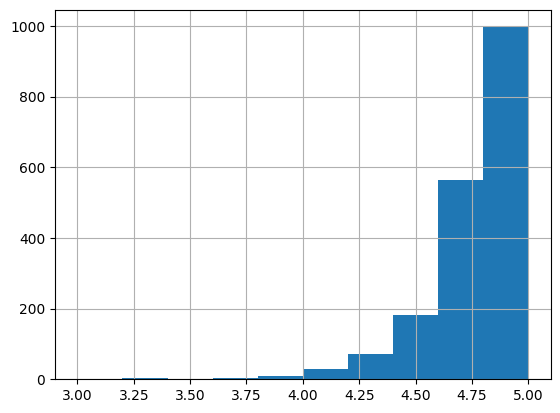

In [9]:
df.stars.hist()

<Axes: >

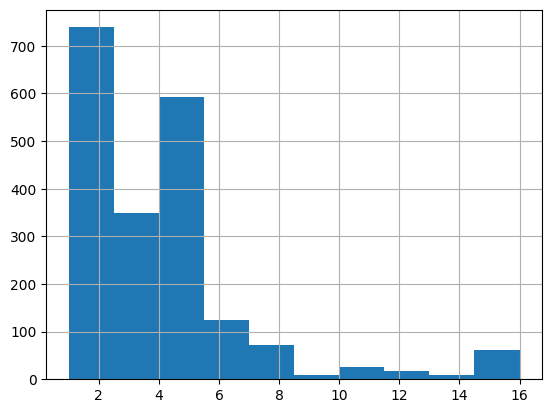

In [10]:
df.numberOfGuests.hist()

<Axes: >

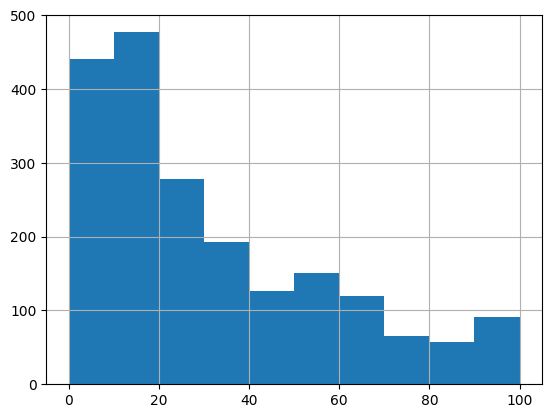

In [11]:
df.occupancyPercentage.hist()

<Axes: >

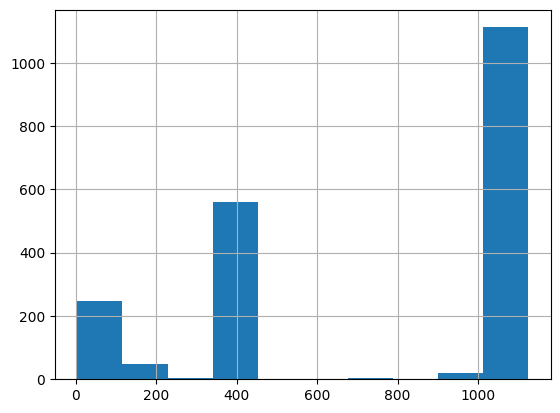

In [12]:
df.maxNights.hist()

<Axes: >

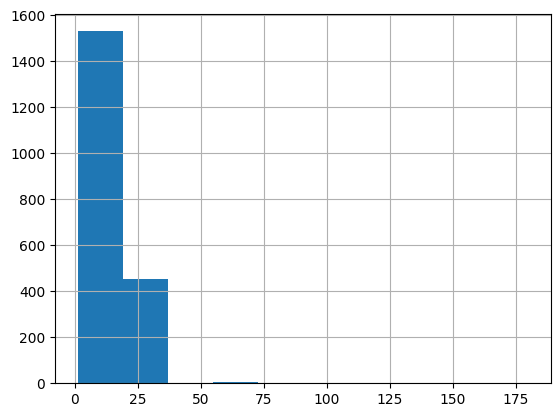

In [13]:
df.minNights.hist()

In [14]:
df.descriptionLocale.value_counts()

descriptionLocale
es    1371
en     607
fr      14
de       5
it       1
nl       1
Name: count, dtype: int64

In [15]:
df.localizedCheckOutTime.value_counts().sort_index()

localizedCheckOutTime
0.0        3
1.0        9
2.0        4
3.0        2
6.0        1
9.0        7
10.0      74
11.0    1108
12.0     575
13.0      40
14.0      12
15.0      12
16.0       3
17.0       3
18.0       1
19.0       1
20.0       1
23.0       3
Name: count, dtype: int64

In [16]:
df.isHotel.value_counts()

isHotel
False    1987
True       12
Name: count, dtype: int64

<Axes: >

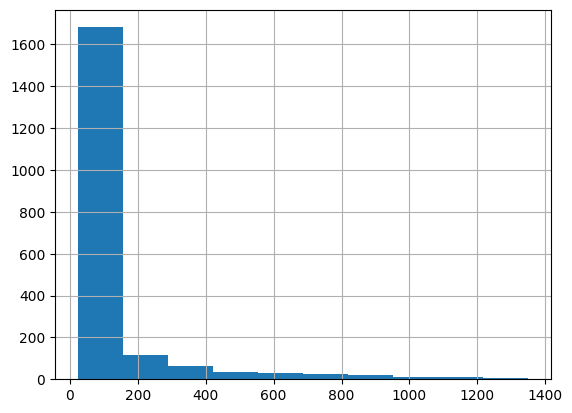

In [17]:
df.price.hist()

In [18]:
df.num_languages.value_counts().sort_index()

num_languages
0     435
1     135
2    1165
3     198
4      54
5       9
6       3
Name: count, dtype: int64

In [19]:
df.responseRate.value_counts()

responseRate
1.0    1735
2.0      91
3.0      39
4.0       8
Name: count, dtype: int64

<Axes: >

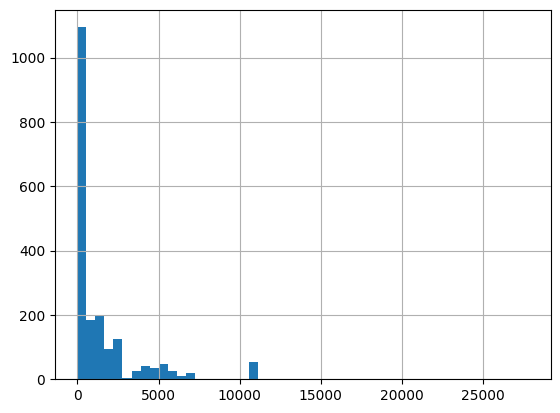

In [20]:
df.hostBadgeEvaluations.hist(bins=50)

<Axes: >

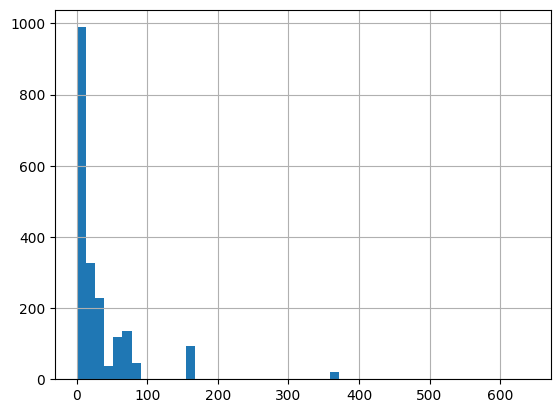

In [21]:
df.hostListingCount.hist(bins=50)

In [22]:
df.superHost.value_counts()

superHost
0    1031
1     968
Name: count, dtype: int64

<Axes: >

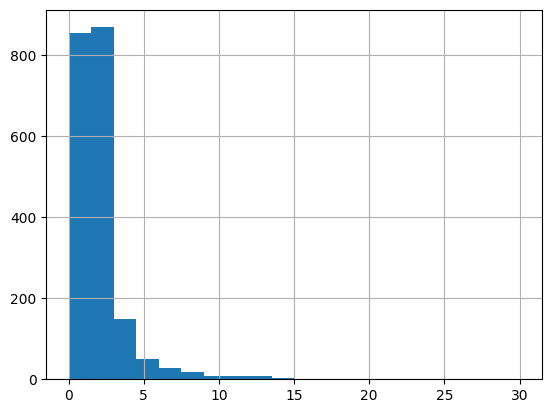

In [23]:
df.numBaths.hist(bins=20)

<Axes: >

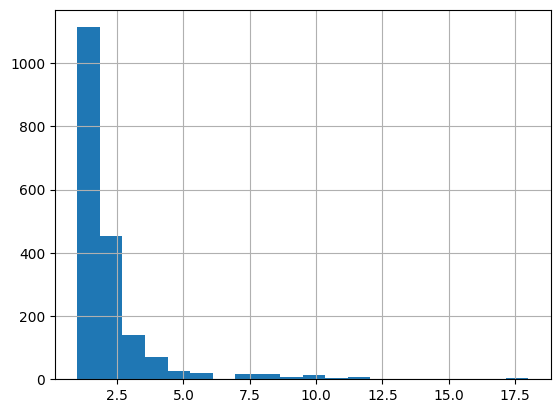

In [24]:
df.numBedrooms.hist(bins=20)

<Axes: >

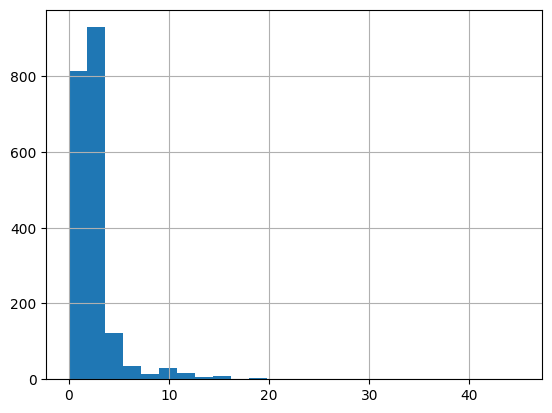

In [25]:
df.numBeds.hist(bins=25)

In [26]:
df.roomTypeCateg.value_counts()

roomTypeCateg
1    1883
2     101
3      12
4       3
Name: count, dtype: int64

<Axes: >

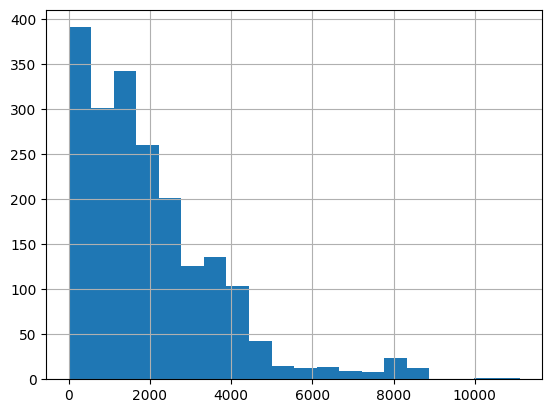

In [27]:
df.descriptionLen.hist(bins=20)

<Axes: >

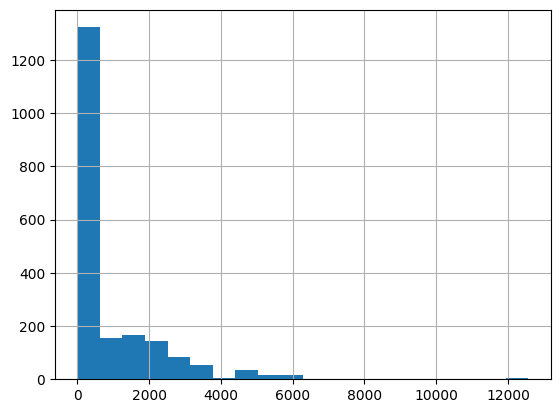

In [28]:
df.houseRulesLen.hist(bins=20)

In [29]:
df.allowChild.value_counts()

allowChild
1    1426
0     573
Name: count, dtype: int64

In [30]:
df.allowEvents.value_counts()

allowEvents
0    1832
1     167
Name: count, dtype: int64

In [31]:
df.allowPets.value_counts()

allowPets
0    1208
1     791
Name: count, dtype: int64

In [32]:
df.allowSmoking.value_counts()

allowSmoking
0    1630
1     369
Name: count, dtype: int64

<Axes: >

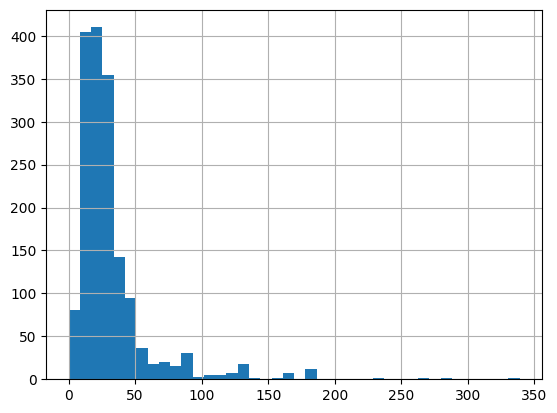

In [33]:
df.cleaningFee.hist(bins=40)

<Axes: >

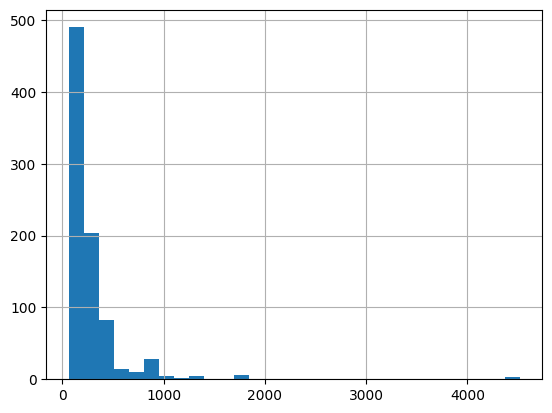

In [34]:
df.fianza.hist(bins=30)

<Axes: >

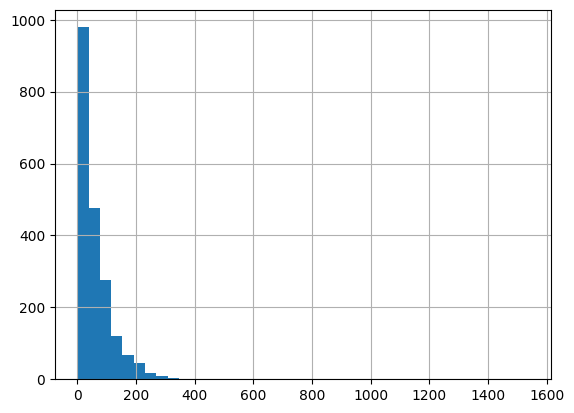

In [35]:
df.numReviews.hist(bins=40)

<Axes: >

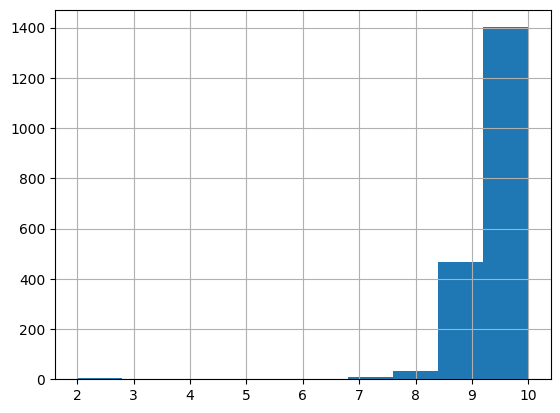

In [36]:
df.reviewScore_1.hist(bins=10)

<Axes: >

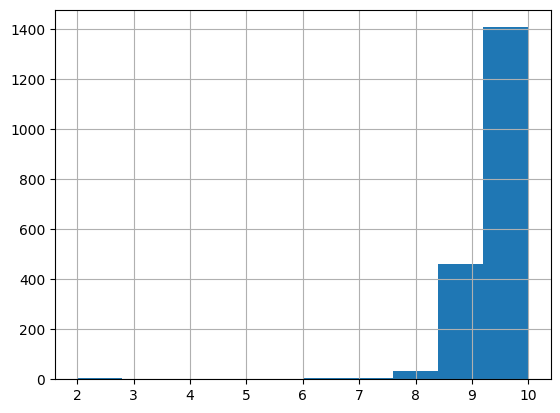

In [37]:
df.reviewScore_2.hist(bins=10)

<Axes: >

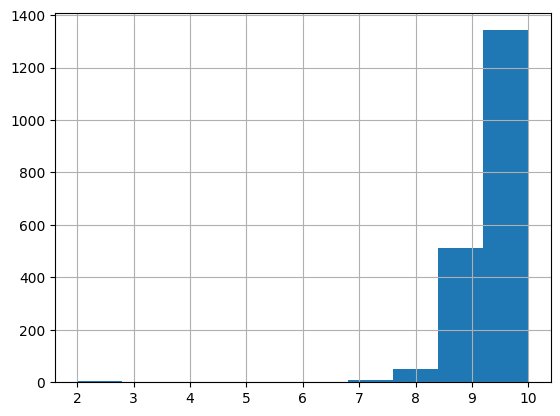

In [38]:
df.reviewScore_3.hist(bins=10)

<Axes: >

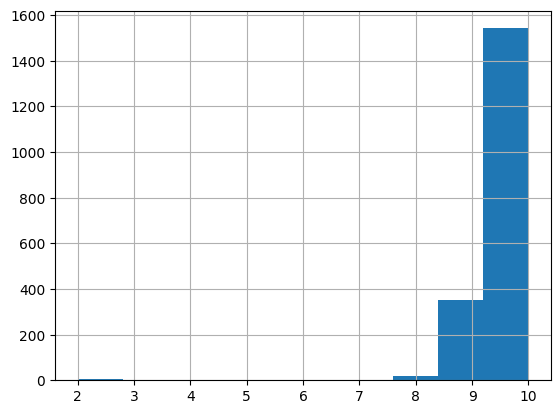

In [39]:
df.reviewScore_4.hist(bins=10)

<Axes: >

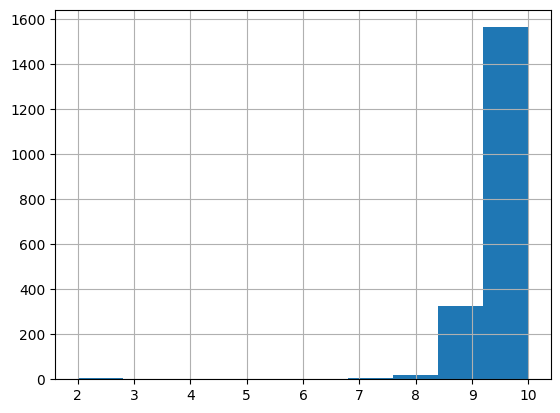

In [40]:
df.reviewScore_5.hist(bins=10)

<Axes: >

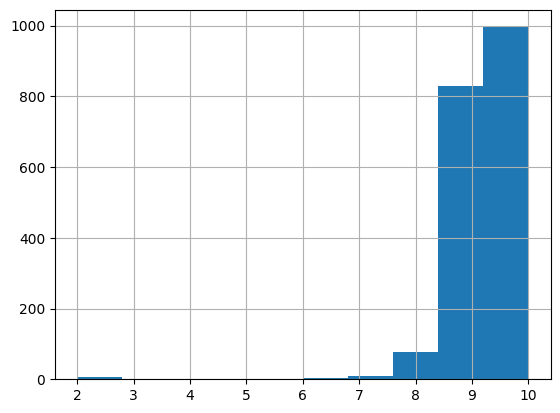

In [41]:
df.reviewScore_6.hist(bins=10)

<Axes: >

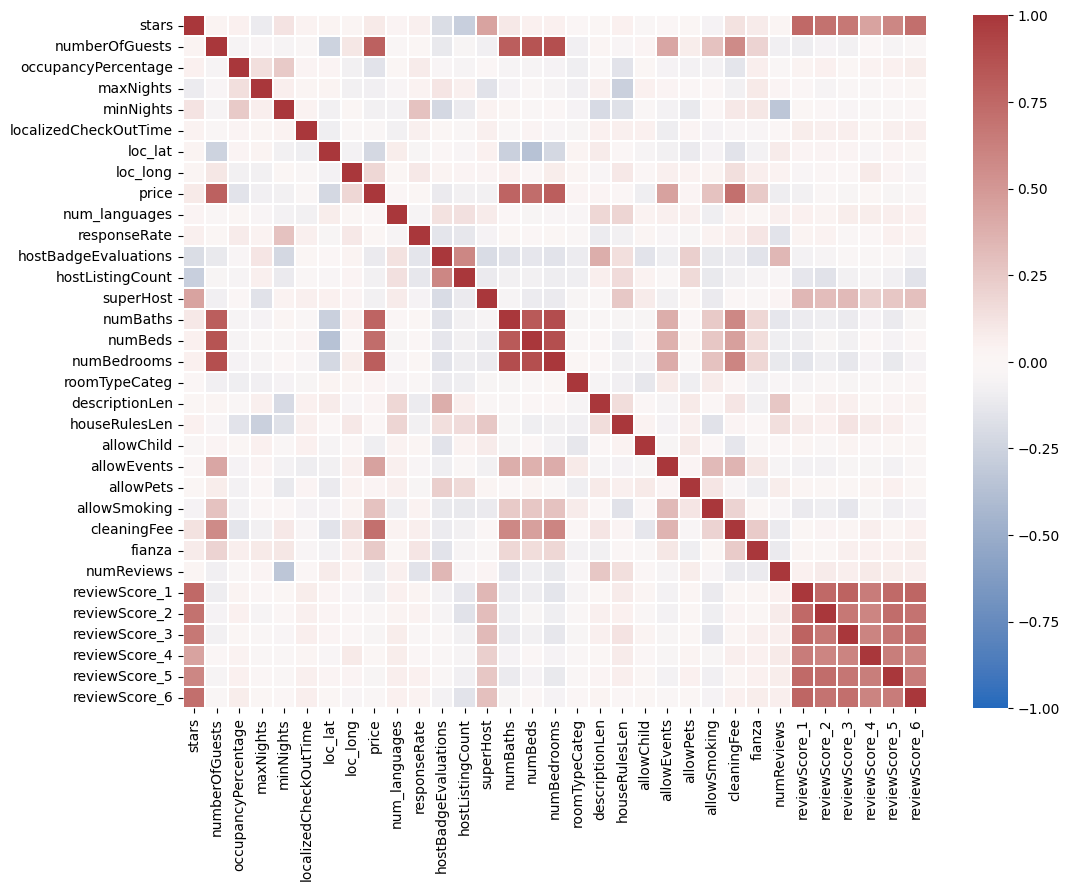

In [43]:
import matplotlib.pyplot as plt

numdf = df.copy()
numdf.drop(columns=['url', 'name', 'id', 'descriptionLocale', 'city', 'hasCommercialHostInfo'], inplace=True)
numdf.drop(columns=['isHotel', 'isRepresentativeInventory', 'profile_pic'], inplace=True)

plt.figure(figsize=(12, 9))
sns.heatmap( numdf.corr(), cmap='vlag', vmin=-1, vmax=1, linewidths=0.25)

<Figure size 1200x900 with 0 Axes>

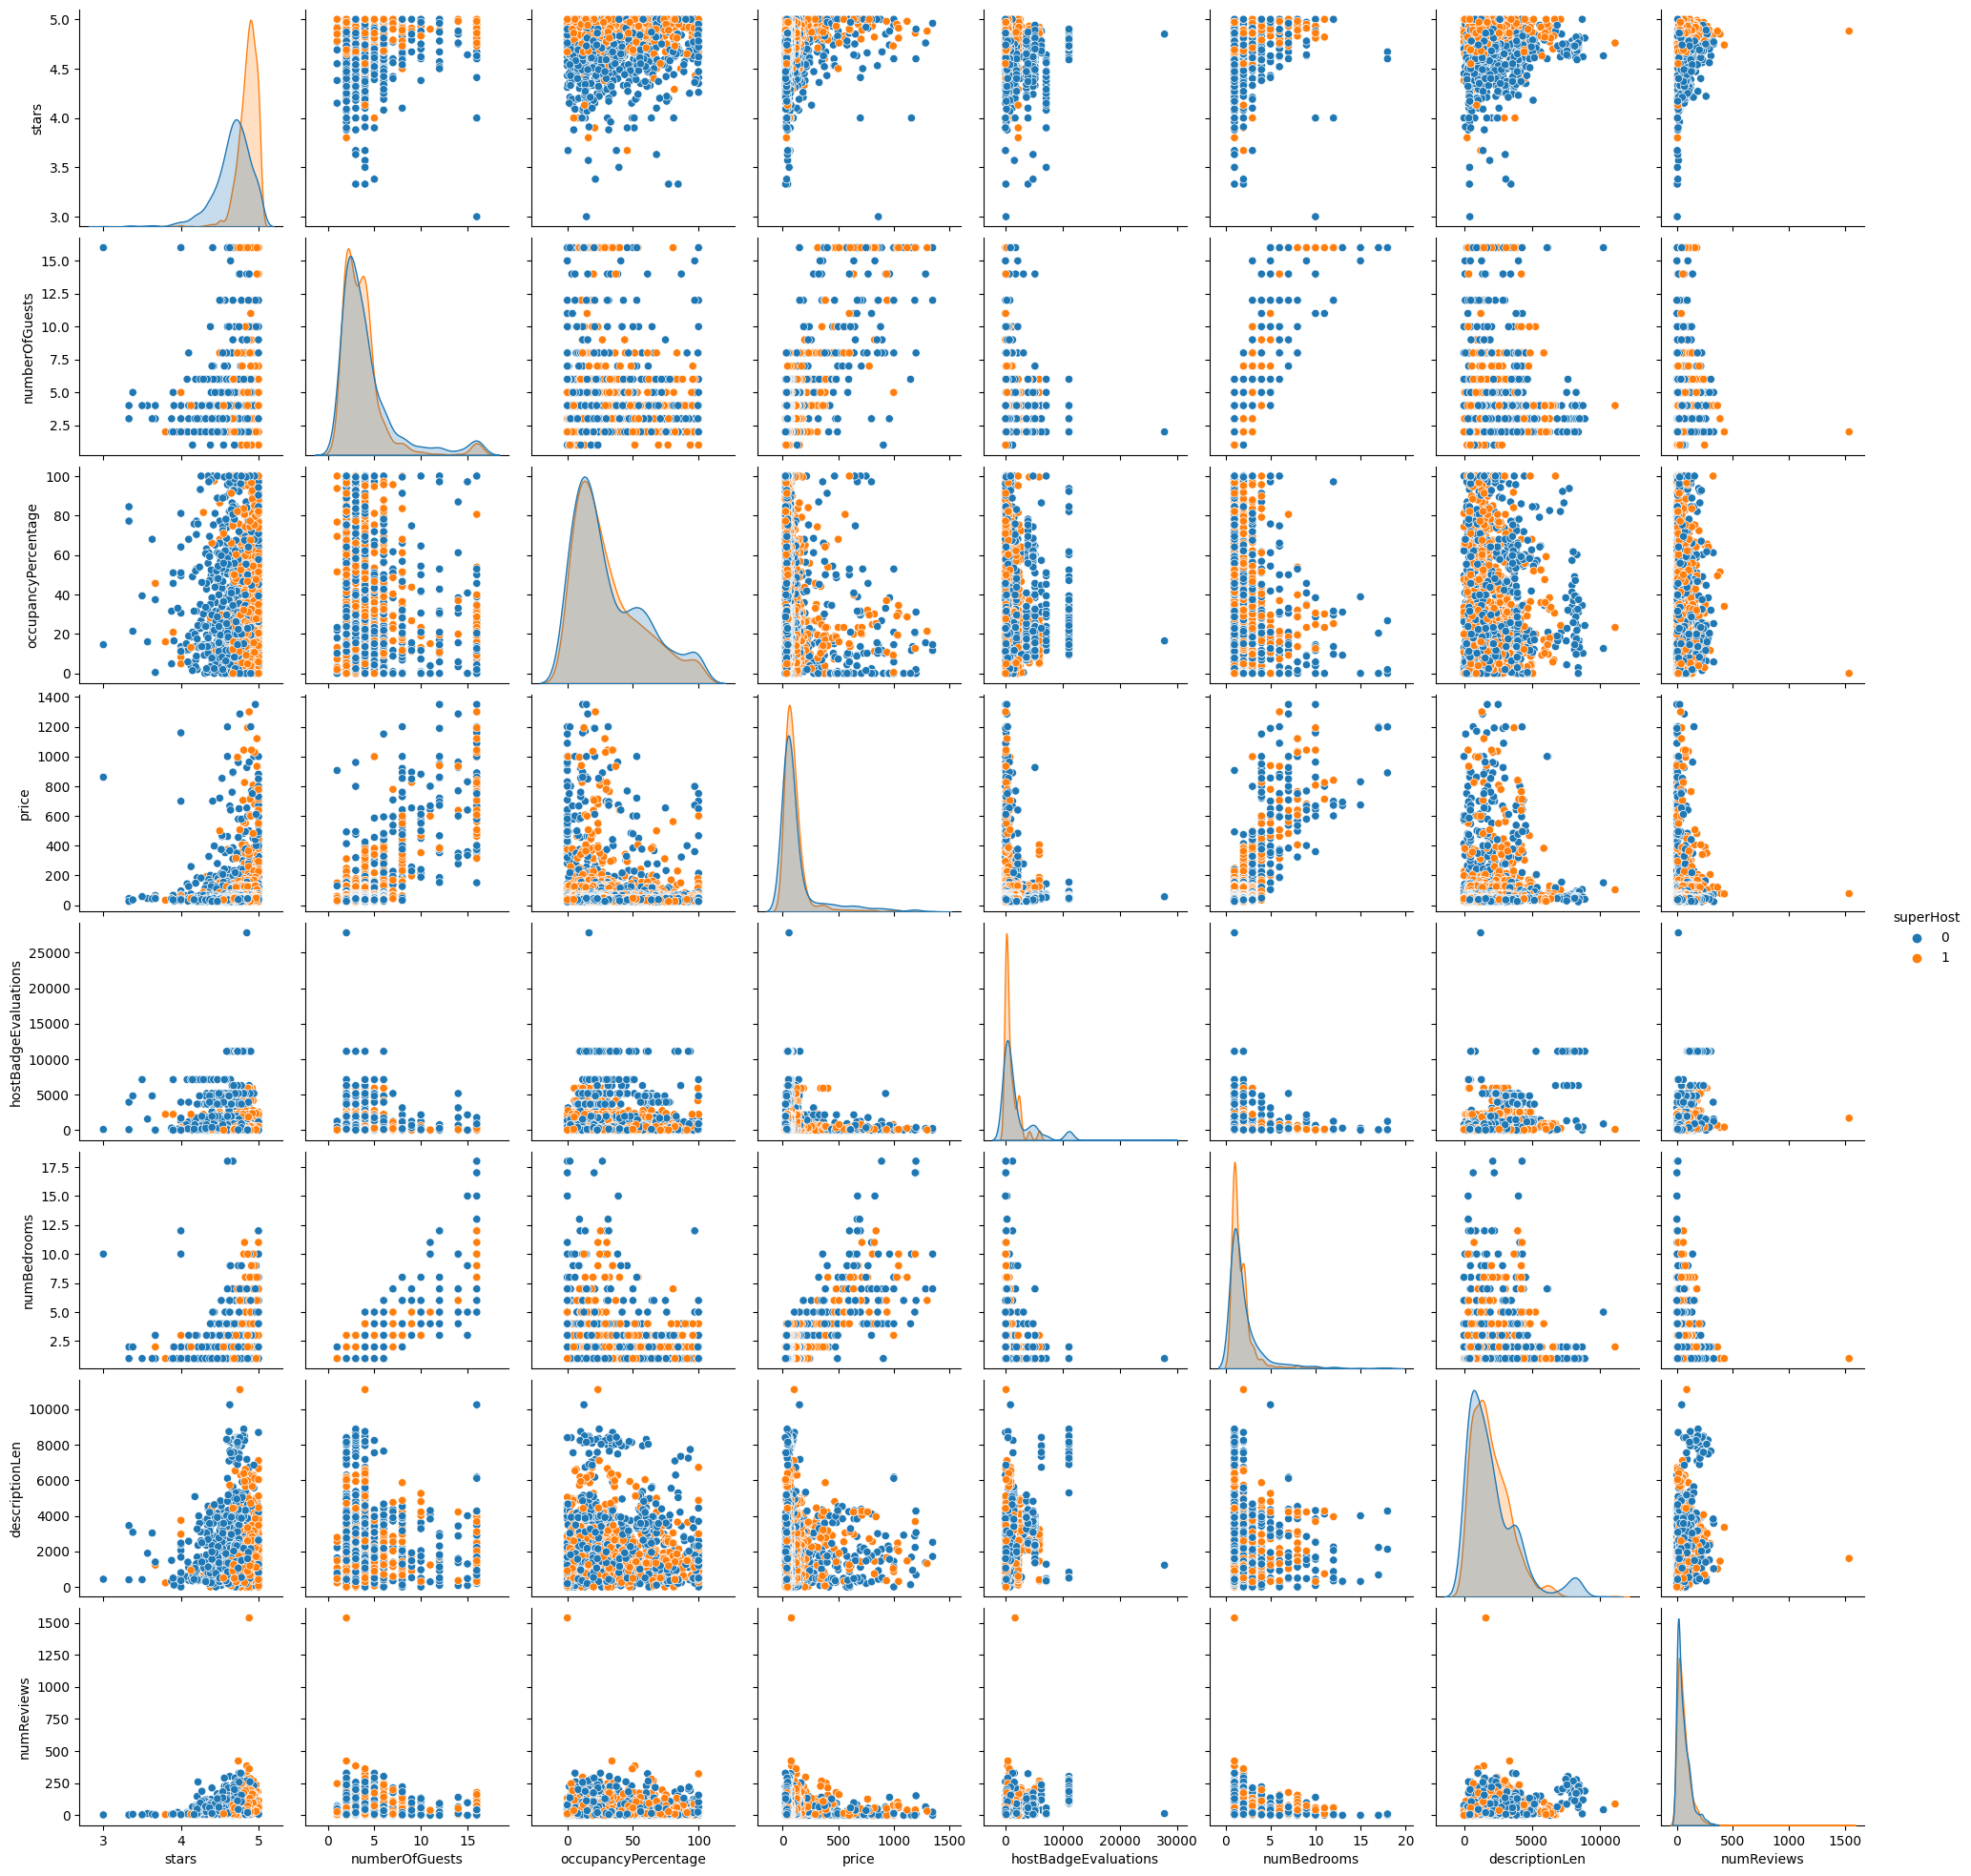

In [44]:
pairplot = numdf[['stars', 'numberOfGuests', 'occupancyPercentage', 'price', 'hostBadgeEvaluations',
                'superHost', 'numBedrooms', 'descriptionLen', 'numReviews']]

plt.figure(figsize=(12, 9))
sns.pairplot(pairplot, hue='superHost')

# Map features

In [45]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm, rgb2hex
import numpy as np

def create_map(ddff, var='stars', othervar=[], name='map.html', normalization='normal'):
    if normalization == 'normal':
        norm = Normalize(ddff[var].min(), ddff[var].max())
    elif normalization == 'log':
        ddff[var] = ddff[var] + 1
        norm = LogNorm(ddff[var].min(), ddff[var].max())

    cmap = plt.get_cmap("cool")
    m = folium.Map(location=[ddff['loc_lat'].mean(), ddff['loc_long'].mean()], zoom_start=13)
    for idx, row in ddff.iterrows():
        # Get the color for this rating (converting the colormap from matplotlib to a valid hex color)
        color = rgb2hex(cmap(norm(row[var])))

        tooltip_list = [f"{var}: {row[var]}<br>"]
        for v in othervar:
            tooltip_list.append(f"{v}: {row[v]}<br>")
        tooltip = ''.join(tooltip_list)  # Combine the list into a single string


        folium.CircleMarker(
            location=(row['loc_lat'], row['loc_long']),
            radius=5,
            color=color,
            fill=True,
            tooltip=tooltip,
            popup=folium.Popup('<a href="{}" target="_blank"> {} </a>'.format(row['url'], row['url'])),  # Here's the popup with a clickable link
            fill_opacity=0.6
        ).add_to(m)
    # Save it to a file
    m.save(name)

In [46]:
create_map(df, var='stars', othervar=['price', 'occupancyPercentage', 'numReviews'], name='map_stars.html')

In [81]:
#df2 = df[df['numberOfGuests'] < 5]
create_map(df, var='price', othervar=['occupancyPercentage', 'numReviews', 'stars', 'numberOfGuests', 'numBedrooms'], name='map_price.html', normalization='log')

In [48]:
#subdf = numdf[numdf['occupancyPercentage'] > 40]
create_map(df, var='occupancyPercentage', othervar=['price', 'numReviews', 'stars'], name='map_occupation.html')

In [49]:
create_map(df, var='numReviews', name='map_numReviews.html', othervar=['occupancyPercentage', 'price', 'stars'], normalization='log')